# Explore observation data

* In-situ (buoy/station) data
    - Significant wave height

Note: The MIKE IO and ModelSkill packages are used here for convenient plotting functionality. They are not required for working with the observation data. 

### Load packages

In [42]:
import pandas as pd
import mikeio
import modelskill as ms
import helper as h
import matplotlib.pyplot as plt

### Define folder and mesh

In [43]:
fldr = "../observations/" 
msh = mikeio.open("../input/Mesh_8000_elems.mesh")


## In-situ stations

In [44]:
df_stn = pd.read_csv(fldr + "stations_subset.csv", index_col=0)
df_stn

,lat,lon
station,,
6201045,54.29402,-0.31852
6201047,55.18517,-1.47835
6201050,53.24490,0.44699
6201059,52.47586,1.81717
A121_,55.41664,3.81663
AkkaertSouthwestBuoy,51.41600,2.81900
Europlatform2,51.99861,3.27639
F3platform,54.85389,4.72750
IJmuidenMunitiestort_,52.55000,4.05833


## Water level stations

In [45]:
q = ms.Quantity(name="Wave height", unit="meter")
whlist = []

for i, row in df_stn.iterrows():
    df = pd.read_csv(fldr + f"{i}.csv", index_col=0)
    df.index = pd.to_datetime(df.index, format="ISO8601")
    print(i)
    o = ms.PointObservation(df.VHM0, x=row['lon'], y = row['lat'], name=i, quantity=q)
    whlist.append(o)


6201045
6201047
6201050
6201059
A121_
AkkaertSouthwestBuoy
Europlatform2
F3platform
IJmuidenMunitiestort_
J61
K13a_
L91_
NieuwpoortBuoy
Nymindegab
Oosterschelde11
Q1_
WaddenEierlandseGat


### Spatial overview

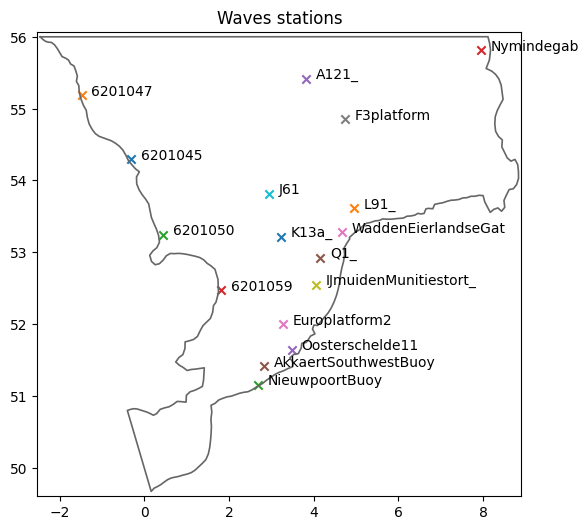

In [46]:
ms.plotting.spatial_overview(whlist, mod=msh.geometry,figsize=(6,6));
plt.tight_layout()
plt.title("Waves stations")
plt.savefig("../figures/stations.png")

### Temporal coverage

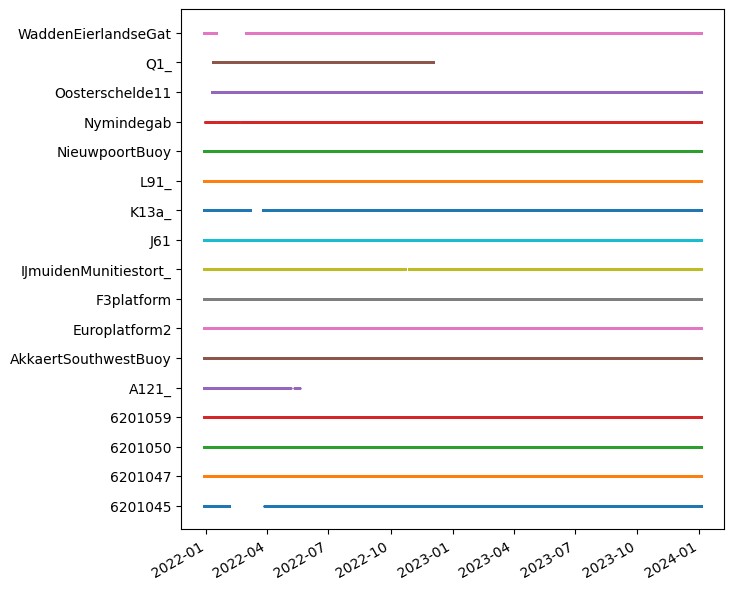

In [47]:
ms.plotting.temporal_coverage(whlist);

## Plot wave height

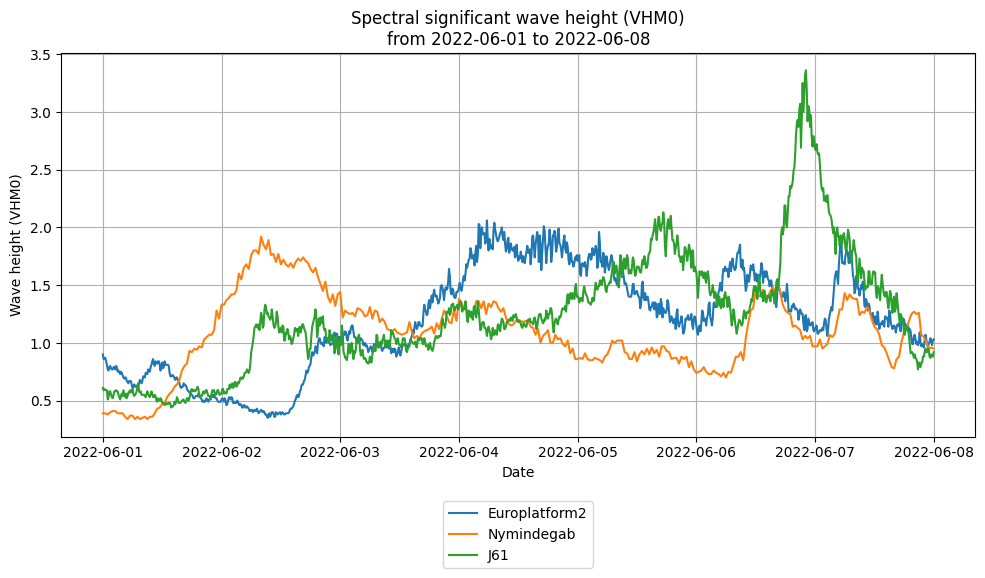

In [48]:
# List of station CSV files
stations = ['Europlatform2.csv', 'Nymindegab.csv', 'J61.csv']  

# Define start and end dates
start_date = '2022-06-01'
end_date = '2022-06-08'

plt.figure(figsize=(10, 6))

# Loop through each station file
for station_file in stations:
    # Load data
    df = pd.read_csv(fldr + station_file, sep=',')
    
    # Ensure TIME column is datetime
    df['TIME'] = pd.to_datetime(df['TIME'], format='ISO8601')
    
    # Filter time range
    mask = (df['TIME'] >= start_date) & (df['TIME'] <= end_date)
    df_filtered = df.loc[mask]
    
    # Plot VHM0 for this station
    station_name = station_file.replace('.csv', '')  # cleaner label
    plt.plot(df_filtered['TIME'], df_filtered['VHM0'], label=station_name)


plt.xlabel('Date')
plt.ylabel('Wave height (VHM0)')
plt.title(f'Spectral significant wave height (VHM0)\nfrom {start_date} to {end_date}')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=1)
plt.grid(True)
plt.tight_layout()
plt.show()